In [ ]:
import numpy as np
import pandas
import pandas as pd
import scipy.stats
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_equal, assert_almost_equal, assert_allclose
from pandas.testing import assert_frame_equal
from typing import Tuple, List
import random

import warnings
warnings.filterwarnings('ignore')

# K-MEANS

Нужно реализовать свой K-means.

В `init` устанавливается кол-во кластеров

В `fit` происходит цикл обучения:

1. Выбор $k$ центральных точек (первый раз произвольно)

2. Ищем расстояния каждой точки выборки до всех центров

3. Разбиваем все точки на множества по признаку расстояния до ближайшего центра (тот центр что ближе по евклидовой метрике, тот кластер и выбираем)

4. Обозначаем новые центры, как среднюю точку получившихся кластеров

5. Если новые центры не сильно отличаются (сумма расстояний между соответствующими центрами не превышает `1e-3`), то заканиваем цикл, иначе повторяем цикл с шага 2 с новыми центрами

In [ ]:
class KMeans():
    def __init__(self, clusters=2, eps=1e-3):
        self.clusters_ = clusters
        self.labels_ = None
        self.X_ = None
        self.eps_ = eps

    def _update_centers(self, X, centers):
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return new_centers, labels

    def fit(self, X: np.array):
        self.X_ = X
        centers_idx = np.random.choice(np.arange(len(self.X_)), self.clusters_)

        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        while norm(new_centers - centers, axis=1).sum() > self.eps_:
            ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

        return self

In [ ]:
N = 300

X1 = np.random.randn(N,2) + np.array([ 3, 3])
X2 = np.random.randn(N,2) + np.array([-3,-3])
X3 = np.random.randn(N,2) + np.array([-3, 3])
X4 = np.random.randn(N,2) + np.array([ 3,-3])

X = np.vstack([X1, X2, X3, X4])

model = KMeans(4)

model.fit(X)
labels = model.labels_

answer = labels.reshape((4,300)).mean(axis=1)

answer.sort()
assert_almost_equal(answer[0], 0, decimal=1)
assert_almost_equal(answer[1], 1, decimal=1)
assert_almost_equal(answer[2], 2, decimal=1)
assert_almost_equal(answer[3], 3, decimal=1)
################################################

N = 100

X1 = np.random.randn(N,1) + np.array([ 2, 0])
X2 = np.random.randn(N,1) + np.array([-2, 0])


X = np.vstack([X1, X2])

model = KMeans(2)

model.fit(X)
labels = model.labels_

assert labels[:101].sum() / 100 < 0.1 or labels[101:].sum() / 100 < 0.1
################################################

X1 = [[1,2], [1,1], [1,0], [1, -1], [1,-2]]
X2 = [[-1,2], [-1,1], [-1,0], [-1, -1], [-1,-2]]
X = np.vstack([X1, X2])

model = KMeans(2)

centers = [[1,1], [-1,-1]]

new_centers, labels = model._update_centers(X, centers)

assert_almost_equal(new_centers, np.array([[ 0.33,  0.83], [-0.5, -1.25]]), decimal=2)

assert_array_equal(labels, [0,0,0,0,1,0,0,1,1,1])


# DBSCAN

В этом задании необходимо реализовать простой вариант DBSCAN.

0. Обозначили **кластер шума** инексом $0$, а текущий кластер $C$ = $1$. Выбрали произвольную точку $p$.

1. Найдем всех **соседей** точки $p$, которые находятся на расстоянии не более чем `eps`.

2. Если соседей **меньше** чем `min_samples`, то мы обозначаем точку $p$ **шумом** (кластер $0$) и возвращаемся к шагу 1.

3. Если соседей `min_samples` или **более**, то обозначаем точку $p$ номером текущего кластера $C$, а соседей добавляем в **очередь**.

4. Пока очередь не пустая, берем новую точку $p$ и возвращаемся к шагу 2.

5. Если очередь пустая, то увеличиваем индекс текущего класса $C$ и возвращаемся к шаг 1.

6. Алгоритм заканчивает работу, когда неразмеченных точек не осталось.

In [ ]:
class DBSCAN():
    def __init__(self, eps=0.5, min_samples=5):
        self.eps_ = eps
        self.min_samples_ = min_samples
        self.distance_ = lambda x, y: np.sqrt((x[0] - y[0])**2 +  (x[1] - y[1])**2)
        self.clusters = {0:[]} #здесь должны лежать лист индексов точек, которые попадают в один кластер
        self.labels_ = None #лейблы по индексам точек

    def _get_neighbours_ind(self, point_ind, X):
        return [ind for ind in range(X.shape[0])
                if self.distance_(X[point_ind], X[ind]) < self.eps_]

    def fit(self, X: np.array):
        self.labels_     = np.zeros(X.shape[0])
        self.visited_ind = np.zeros(X.shape[0])

        C = 1

        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

        for root in range(X.shape[0]):

            ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

            while neighbours:
                new_ind = neighbours.pop()
                if self.visited_ind[new_ind]:
                    continue

                ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

        return self

In [ ]:
num_samples = 200
theta = np.linspace(0, 2*np.pi, num_samples)

r1 = 1
r2 = 2

rng = np.random.RandomState(1)

circle = np.hstack([np.cos(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 32),
                    np.sin(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 32)])
lil = r1 * circle
big = r2 * circle

X_circle = np.vstack([lil, big])

model = DBSCAN(eps=0.3, min_samples=4).fit(X_circle)

labels_circle = model.labels_

answer = labels_circle.reshape((2,200)).mean(axis=1)

answer.sort()
assert_almost_equal(answer[0], 1, decimal=2)
assert_almost_equal(answer[1], 2, decimal=2)


##################################################################

X = [[np.random.randn()/6, np.random.randn()/6] for i in range(150)]
X.extend([[np.random.randn()/4 + 2.5, np.random.randn()/5] for i in range(150)])
X.extend([[np.random.randn()/5 + 1, np.random.randn()/5 + 1] for i in range(150)])
X.extend([[i/25 - 1, + np.random.randn()/20 - 1] for i in range(150)])
X.extend([[i/25 - 2.5, 3 - ((i+30)/60 - 2)**2 + np.random.randn()/20] for i in range(150)])

X = np.array(X)

model = DBSCAN(eps=0.2, min_samples=4).fit(X)

answer = model.labels_.reshape((5,150)).mean(axis=1)

answer.sort()
assert_almost_equal(answer[0], 1, decimal=1)
assert_almost_equal(answer[1], 2, decimal=1)
assert_almost_equal(answer[2], 3, decimal=1)
assert_almost_equal(answer[3], 4, decimal=1)
assert_almost_equal(answer[4], 5, decimal=1)

# EM-алгоритм

В этом задании необходимо реализовать EM-алгоритм для двумерного случая (на самом деле можно и большемерного, но все тесты будут двумерные).

На E-шаге необходимо пересчитать вероятности попадания каждого объекта в каждый из классов (при фиксированных $\mu$ и $\Sigma$ для каждого класса). На выходе мы получаем лист длины `n_clusters`, каждый объект которого - np.array c текущими вероятностями.

$$g[c,i] = P(y=c|x_i) = \frac{w_c p(x_i|\mu_c, \Sigma_c)}{\sum_{s \in C} w_s p(x_i|\mu_s, \Sigma_s)}$$

где
* С - множество классов
* p(x|\mu_c, \Sigma_c) - многомерное нормальное распределение с матожиданием $\mu_c$ и матрицей ковариаций $\Sigma_c$

На М-шаге нам нужно пересчитать наши параметры распределений:

* Априорная вероятность конкретного класса (массив вероятностей)
    $$w_c = P(y=c) = \frac{1}{N}\sum^{N}_{i}g[c,i]$$

* Новые матожидания (лист массивов, который содержит матожидание для 1 и 2 размерности)
    $$\mu_c =  \frac{1}{N w_c}\sum^{N}_{i}g[c,i]x_i$$

* Новые матрицы ковариаций (лист массивов, который содержит матожидание для 1 и 2 размерности)
    $$\Sigma_c =  \frac{1}{N w_c}\sum^{N}_{i}g[c,i]f(x_i - \mu_c)$$
где $f(x) = xx^T$ - матрица попарных перемножений
$$f([a1,a2]) = \begin{bmatrix}
    a1a1  & a1a2 \\
    a2a1  & a2a2
\end{bmatrix}$$


Задача очевидно может не зайти с первого раза. Отработайте локально, что задача в большинстве случаев заходит и несколько раз переотправьте.

In [ ]:
from scipy.stats import multivariate_normal
import random
from typing import List, Tuple

class EM_algo():
    def __init__(self, n_clusters=2, n_iter=10):
        self.n_clusters_ = n_clusters
        self.n_iter = n_iter
        self.mu_ = None # лист векторов матожиданий List[np.array]
        self.cov_ = None # лист матриц ковариаций List[np.array]
        self.w_ = np.ones(n_clusters) * 1 / n_clusters #изначально заполняем w-шки равномерно
        self.X_ = None # запоминаем выборку

    def _estep(self) -> List[np.array]:
        for i in range(self.n_clusters_):
            p = multivariate_normal.pdf( ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ# вероятности кластера i для каждого объекта, вектор размера выборки
            ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return g

    def _mstep(self, g):
        self.w_ = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

        self.mu_ = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

        for i in range(self.n_clusters_):
            dX = self.X_ - self.mu_[i]
            self.cov_[i] = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

        return self.mu_, self.cov_
    
    def plot_em(self):
        x1 = np.linspace(-4,11,200)
        x2 = np.linspace(-4,11,200)
        Xl, Yl = np.meshgrid(x1,x2)

        Z = [multivariate_normal(mu, s) for mu, s in zip(self.mu_, self.cov_)]

        pos = np.empty(Xl.shape + (2,))                # a new array of given shape and type, without initializing entries
        pos[:, :, 0] = Xl; pos[:, :, 1] = Yl

        plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
        plt.scatter(self.X_[:,0], self.X_[:,1], marker='o')
        color = ["r", "b", "g"]
        for i in range(self.n_clusters_):
            plt.contour(Xl, Yl, Z[i].pdf(pos), colors=color[i] ,alpha = 0.5)
        plt.axis('equal')                                                                  # making both the axis
        plt.grid()                                                                         # displaying gridlines
        plt.show()



    def fit(self, X: np.array, log=False):
        self.X_ = X
        self.mu_  = [random.choice(X) for _ in range(self.n_clusters_)] #берем произвольные точки как центры наших кластеров List[np.array]
        self.cov_ = [np.cov(np.transpose(X)) for _ in range(self.n_clusters_)] #считаем матрицу ковариаций для каждого распределения List[np.array]
        for _ in range(self.n_iter):
            self._mstep(self._estep())
            if log:
                self.plot_em()
        return self

In [ ]:
x01 = [[1,1],[1.1,1.1],[0.9,0.9],[1,1.2]]
x02 = [[7,7],[7.1,7.1],[6.9,6.9],[7,7.2]]
X0 = np.concatenate((x01, x02), axis=0)

model = EM_algo(n_clusters=2, n_iter=2)
model.mu_  = [[2,2],[5,5]]

model.cov_ = [[[3, 1], [-1, 3]],
              [[3, 3], [0.5, 10]]]
model.X_ = X0

g = model._estep()

assert_almost_equal(g, [[0.967, 0.965, 0.969, 0.968, 0., 0., 0., 0.],
                        [0.033, 0.035, 0.031, 0.032, 1.,1., 1., 1.]], decimal=2)

w, mu, cov = model._mstep(g)

assert_almost_equal(w, [0.484, 0.516], decimal=2)
assert_almost_equal(mu, [[1., 1.05], [6.81, 6.86]], decimal=2)

assert_almost_equal(cov, [[[0.006, 0.006], [0.006, 0.013]], [[1.107, 1.107], [1.107, 1.115]]], decimal=2)


######################################################

m1 = [1 ,1]      # consider a random mean and covariance value
m2 = [7 ,7]
cov1 = [[1, 0.5], [0.5, 1]]
cov2 = [[1,-0.5], [-0.5, 1]]
x11 = np.random.multivariate_normal(m1, cov1, size=(200,))  # Generating 200 samples for each mean and covariance
x12 = np.random.multivariate_normal(m2, cov2, size=(200,))
X1 = np.concatenate((x11, x12), axis=0)

model = EM_algo(n_clusters=2, n_iter=30)

model.fit(X1)


if model.mu_[0][0] < model.mu_[1][0]:
    assert_allclose(model.mu_, [m1, m2], atol=0.5)
    assert_allclose(model.cov_, [cov1, cov2], atol=0.5)
else:
    assert_allclose(model.mu_, [m2, m1], atol=0.5)
    assert_allclose(model.cov_, [cov2, cov1], atol=0.5)

##################################################################3

m1 = [0 ,8]
m2 = [1 ,1]      # consider a random mean and covariance value
m3 = [7 ,7]

cov1 = np.array([[1, 2], [2, 1]]) * 1/4
cov2 = np.array([[3, 2], [2, 3]]) * 1/4
cov3 = np.array([[2, -1], [-1, 2]]) * 1/4

x21 = np.random.multivariate_normal(m1, cov1, size=(50,))  # Generating 200 samples for each mean and covariance
x22 = np.random.multivariate_normal(m2, cov2, size=(50,))
x23 = np.random.multivariate_normal(m3, cov3, size=(50,))

X2 = np.concatenate((x21, x22, x23), axis=0)

model = EM_algo(n_clusters=3, n_iter=30)

model.fit(X2)

sort_idx = model.mu_[:, 0].argsort()
assert_allclose(model.mu_[sort_idx], [m1, m2, m3], atol=0.5)
assert_allclose(np.array(model.cov_)[sort_idx], [cov1, cov2, cov3], atol=0.5)

##################################################################3

В ноутбук на гите добавлен метод plot_em. Можете использовать его для отрисовки картинок красивых.

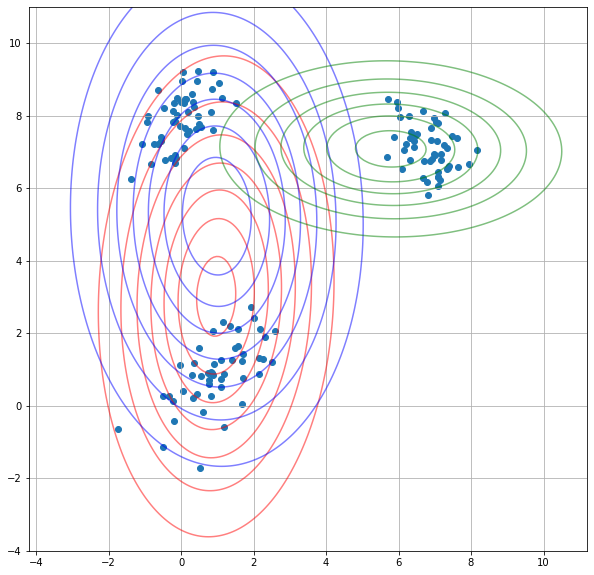

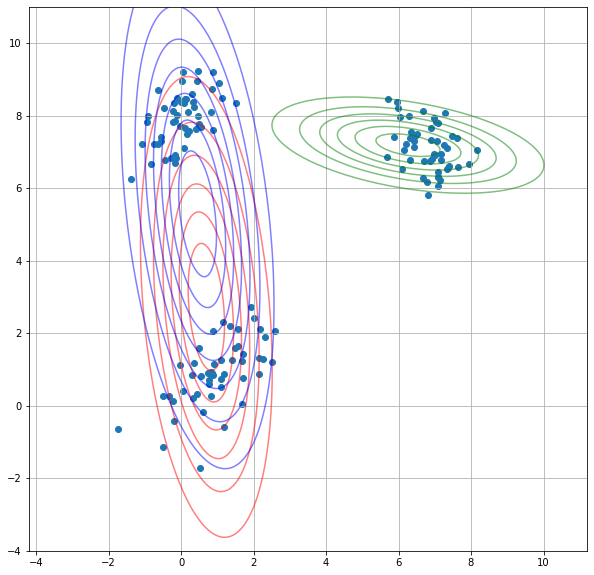

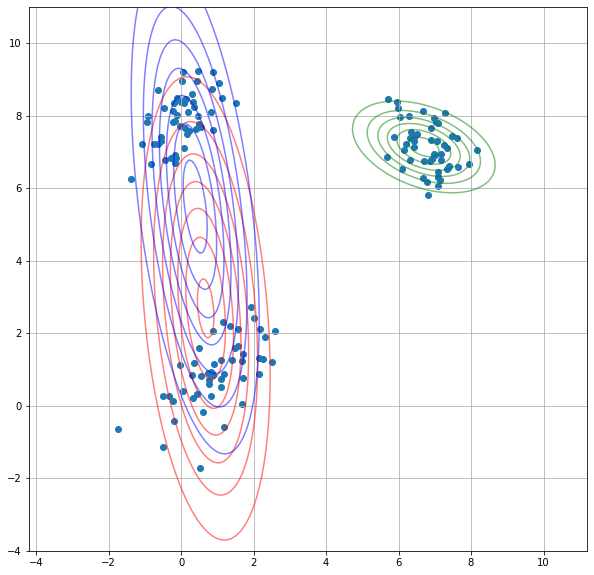

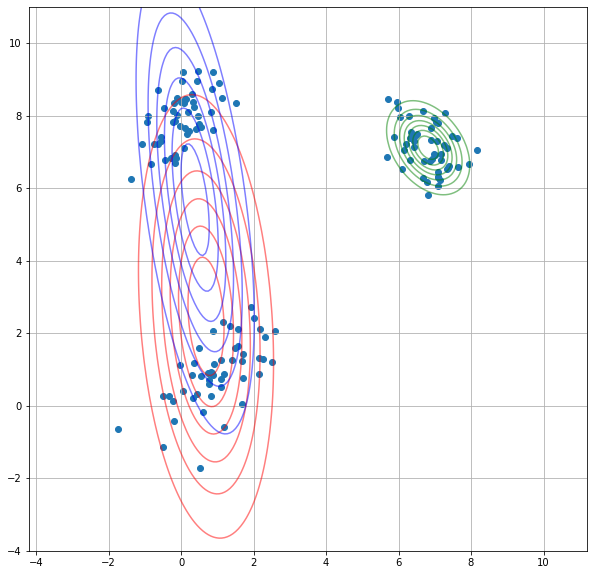

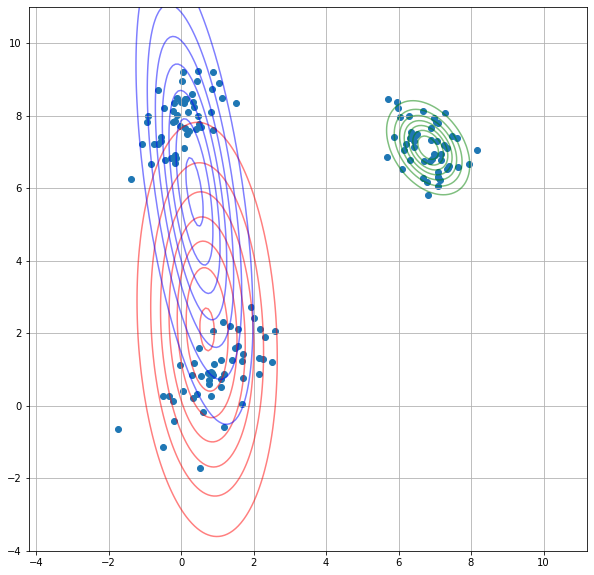

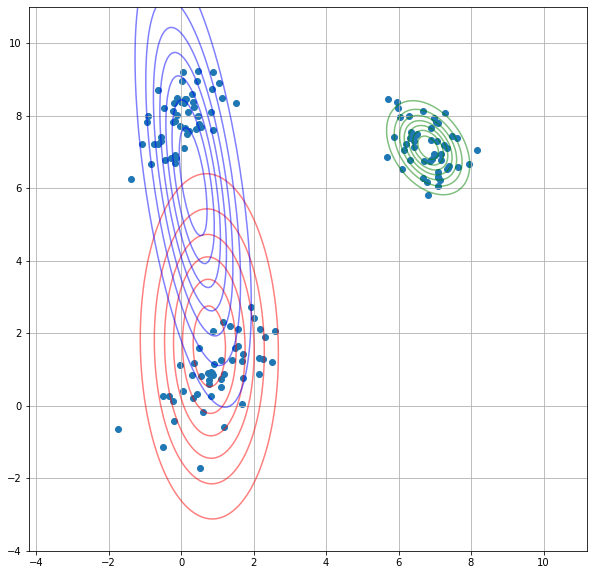

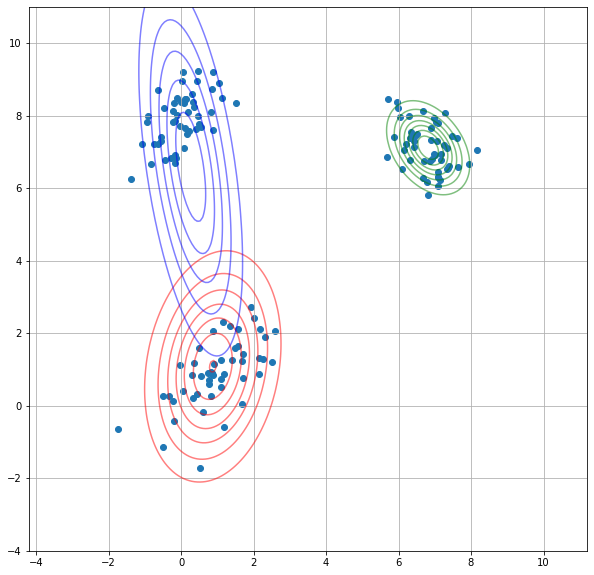

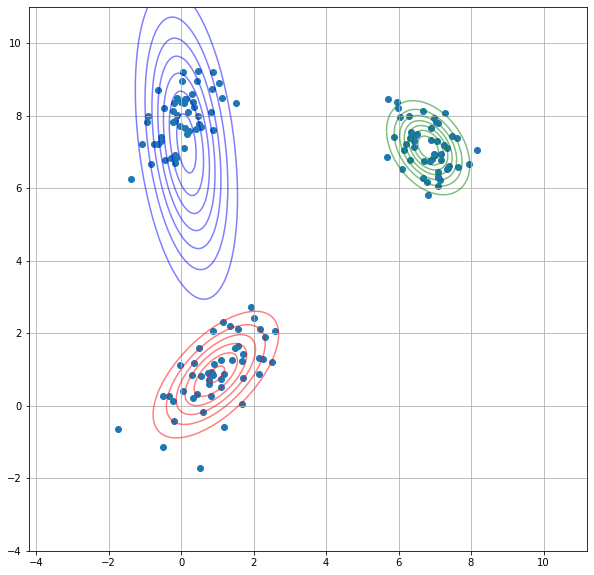

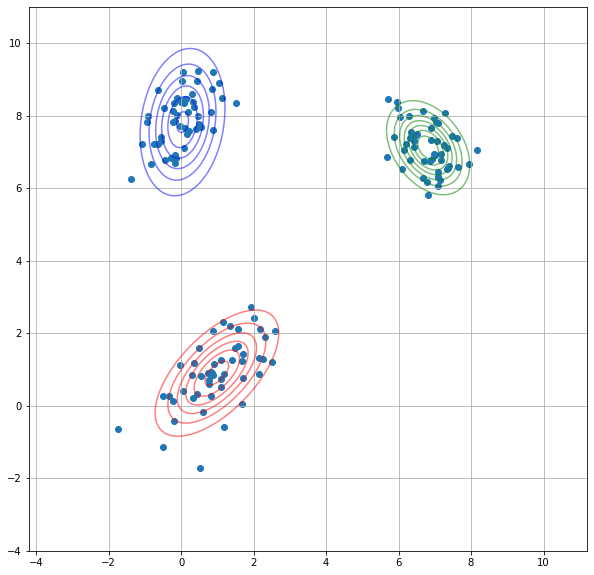

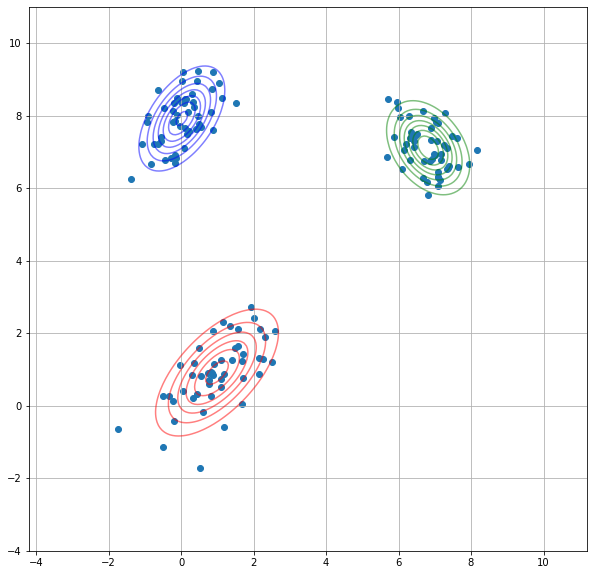

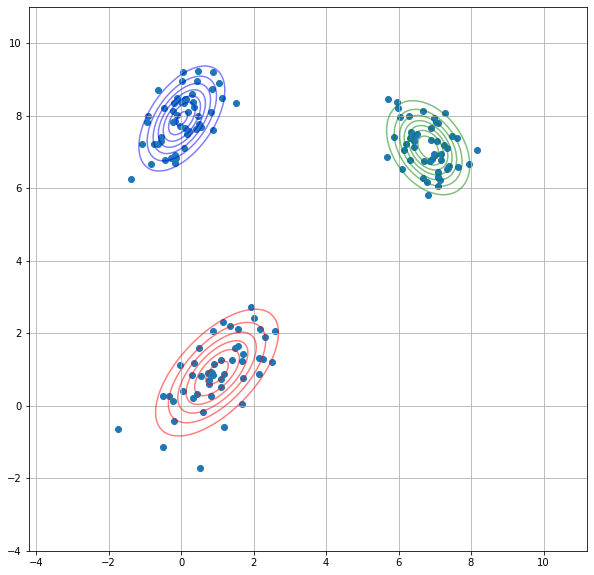

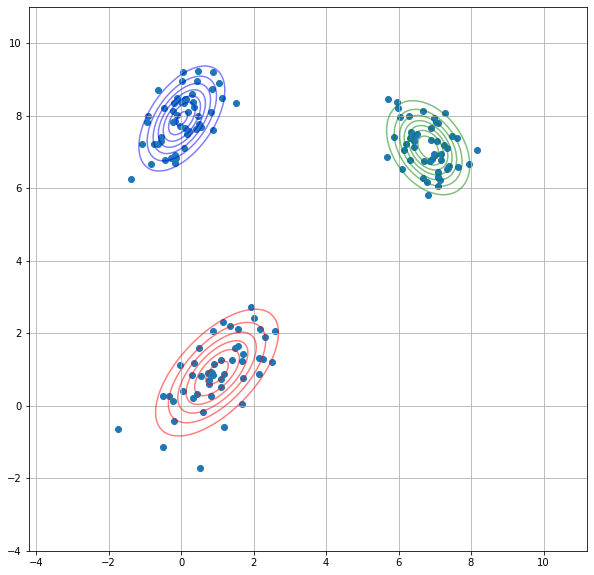

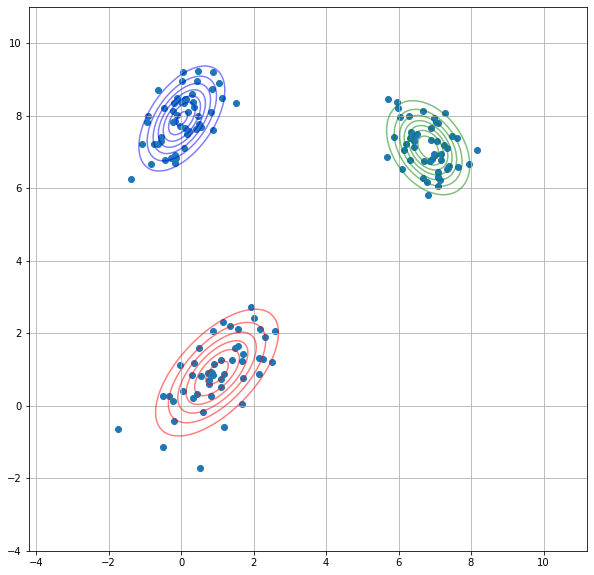

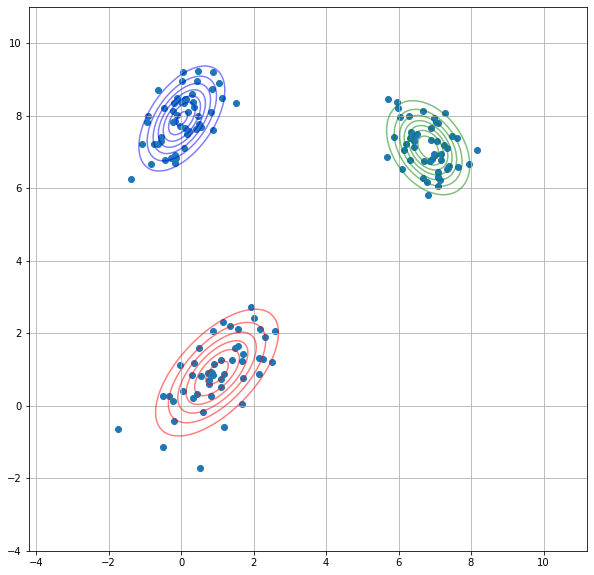

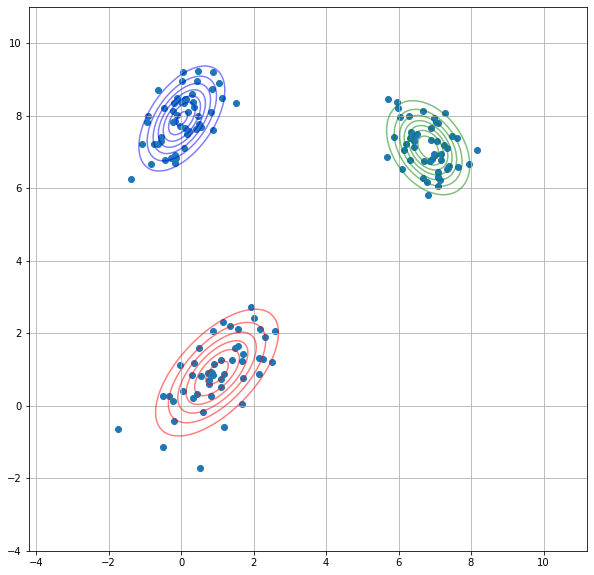

In [11]:
model = EM_algo(n_clusters=3, n_iter=15)
model.fit(X2, log=True)

# Standart Average

В этом задании необходимо сделать стандартные фичи усреднения для врменного ряда. Не забудьте сделать shift, чтобы фичи были ДО предсказзываемого значения.

* `SMA_n` - экспоненциальное среднее на последних n днях

* `EMA_n` - экспоненциальное среднее при параметре `com=9` (тоже самое что `alpha=1/(1 + com)`)


In [ ]:
def ts_averages(df: pd.DataFrame) -> pd.DataFrame:
    df['EMA_9']  = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    df['SMA_5']  = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    df['SMA_10'] = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    df['SMA_15'] = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    df['SMA_30'] = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return df

In [ ]:
df = pd.read_csv('data/nflx.us.txt', sep=',')

df['Date'] = pd.to_datetime(df['Date'])
df = df[(df['Date'].dt.year >= 2015)].copy()
df.index = range(len(df))

answer = ts_averages(df)[['Close','EMA_9', 'SMA_5', 'SMA_10', 'SMA_15', 'SMA_30']][400:].reset_index(drop=True)

assert_frame_equal(answer, pd.read_csv('data/answer_ma.csv'))



# More Features

Исследовательская задача. Вам необходимо разобраться в 2-х известных фичах, для предсказания валют и реализовать. Даны предварительные ссылки на википедию, но можно юзать все что угодно.

* `RSI` - [Индекс_относительной_силы](https://ru.wikipedia.org/wiki/Индекс_относительной_силы)

* `MACD = EMA_12 - EMA_26` - смотри описание по ссылка ниже

* `MACD_signal` - [Индикатор_MACD](https://ru.wikipedia.org/wiki/Индикатор_MACD)

Подсказки:

* в `RSI` нужно делать `rolling n=14` (14 дневный стандартный период)

* В `RSI` У понижающих цен не забудьте взять abs

* Для подсчета `EMA_m` нужно установить `span=m` и `min_periods=m`


In [ ]:
def extra_features(df: pd.DataFrame) -> pd.DataFrame:
    df['RSI'] = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    df['MACD'] = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    df['MACD_signal'] = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return df

In [ ]:
df = pd.read_csv('data/nflx.us.txt', sep=',')

df['Date'] = pd.to_datetime(df['Date'])
df = df[(df['Date'].dt.year >= 2015)].copy()
df.index = range(len(df))

answer = extra_features(df)[['Close','RSI', 'MACD_signal']][400:].reset_index(drop=True)

assert_frame_equal(answer, pd.read_csv('data/answer_rsi_macd.csv'))



# TSprediction

Задачи:

* Сгенерировать таргет Close+1 (не забудьте убрать последний элемент)

* Сгенерируйте фичи по функциям из предыдущих задач

* Оставить данные только начиная с 2016 года, чтобы не было проблем с Nan

* Убрать все фичи, кроме тех, что мы сгенерировали в предыдущих заданиях

* Разбить на трейн и тест в отношении 0.85:0.15

* Обучить CatboostRegressor и вернуть его


In [ ]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

def ts_catboost(df: pd.DataFrame) -> pd.DataFrame:
    df['Close+1'] = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

    X_train, X_test, y_train, y_test = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

    model = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

    return model, X_test, y_test

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
df = pd.read_csv('data/nflx.us.txt', sep=',')

df['Date'] = pd.to_datetime(df['Date'])
df = df[(df['Date'].dt.year >= 2015)].copy()
df.index = range(len(df))

model, X_test, y_test = ts_catboost(df)

assert X_test.shape == (71, 8)

assert_array_equal(y_test[-10:], [198.37, 196.43, 198.00, 199.32, 200.01, 200.13, 195.89, 196.44, 193.90, 192.02])

assert MSE(model.predict(X_test), y_test) < 900